In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import seaborn as sns
from pathlib import Path
sns.set_style('whitegrid')  # Set whitegrid style from Seaborn
#import mplfinance as mpf
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import plotly.express as px
import matplotlib.ticker as tkr
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
from collections import defaultdict
from scipy import stats
from datetime import datetime
import pytz
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 500)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#import neptune as neptune
from scipy.interpolate import CubicSpline


In [3]:
palette = {'gray': '#5e6268',
 'light_blue': '#08a2e0',
 'blue_gray': '#74989a',
 'teal': '#3ba8be',
 'red': '#eb491f',
 'light_teal': '#69bed4',
 'dark_gray': '#0c131d',
 'dark_blue': '#244473',
 'medium_blue': '#2464ac',
 'peach': '#eab995'}

In [4]:
merged_df = pd.read_csv('C:/Users/kathe/Documents/ppc-isp-energy-offers/data/PHASE3/demo.csv')
merged_df.drop(columns = ['Unnamed: 0'],axis=1,inplace = True)

In [5]:
merged_df.head()

,datetime_from,price,price1,price2,price3
0,2023-07-28 00:00:00,107.99,98.83,95.05,107.123
1,2023-07-28 01:00:00,106.04,95.19,93.70,104.801
2,2023-07-28 02:00:00,106.10,97.00,87.98,102.977
3,2023-07-28 03:00:00,105.00,100.36,89.45,109.143
4,2023-07-28 04:00:00,102.22,109.23,101.46,116.560


In [6]:
df=merged_df.copy()

In [7]:
df['datetime_from'] = pd.to_datetime(df['datetime_from'])

In [8]:
def mean_error(y_true, y_pred):
    return np.mean(y_pred - y_true)

In [9]:
# Function to calculate Mean Error
def mean_error(y_true, y_pred):
    return np.mean(np.array(y_pred) - np.array(y_true))

# Prepare the data for plotting MAE and ME
prices = ['price1', 'price2', 'price3']
metrics_data = {price: {'MAE': [], 'ME': []} for price in prices}

for index, row in df.iterrows():
    y_test = row['price']
    for price in prices:
        y_pred = row[price]
        mae = np.mean(np.abs(np.array([y_pred]) - np.array([y_test])))
        me = mean_error([y_test], [y_pred])

        metrics_data[price]['MAE'].append(mae)
        metrics_data[price]['ME'].append(me)


In [18]:
# Define the color palette
palette = {
    'price1': '#3ba8be',  # teal
    'price2': '#244473',  # dark_blue 
    'price3': '#eab995'   # peach
}

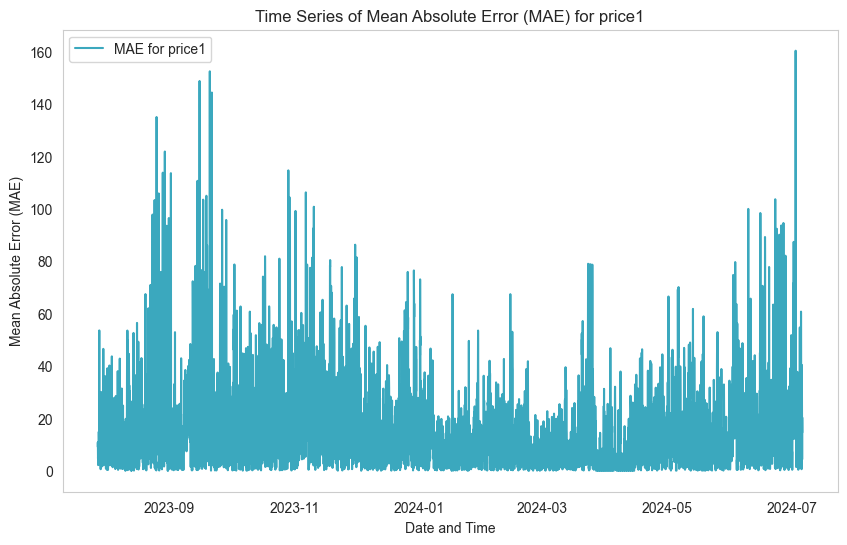

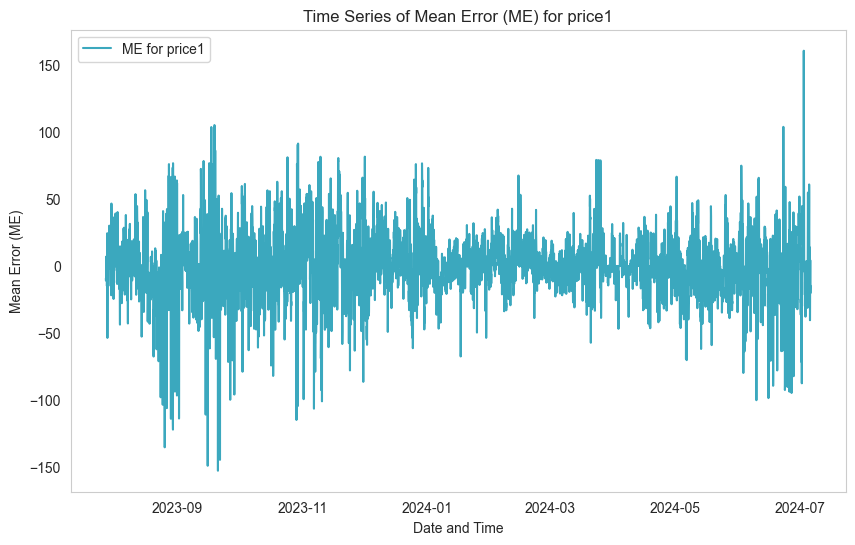

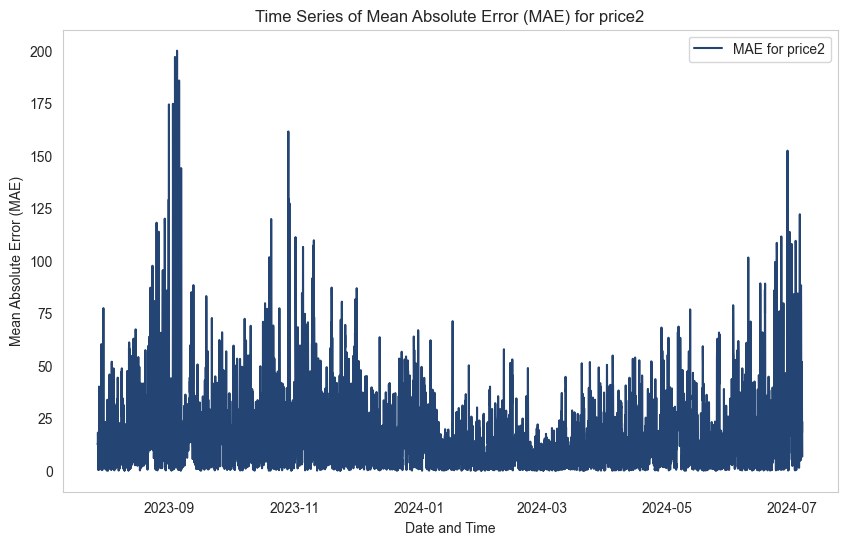

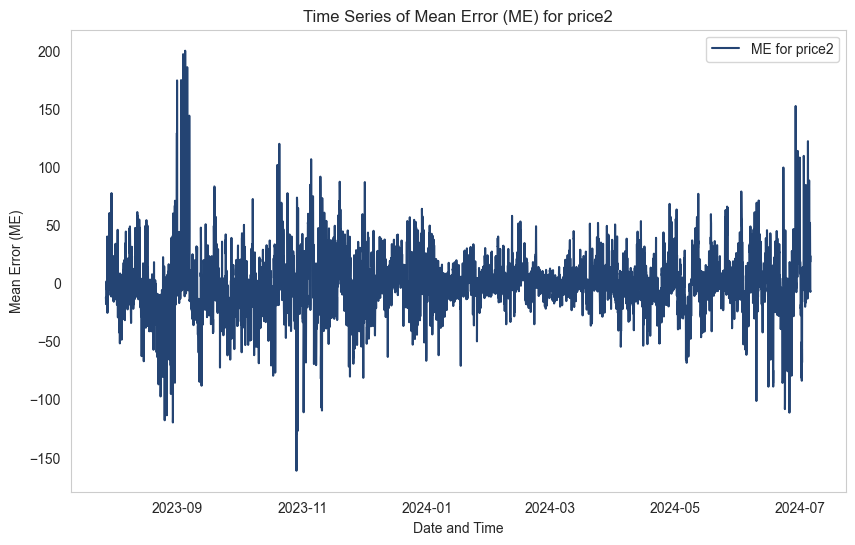

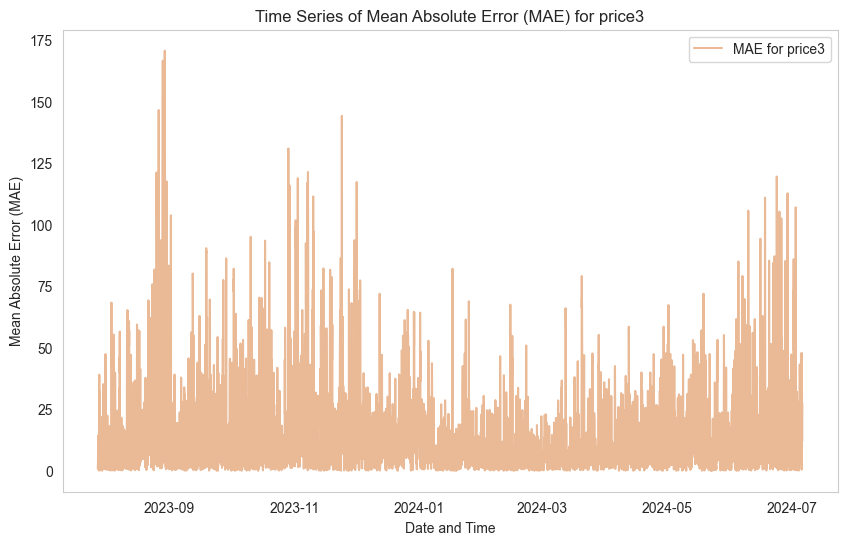

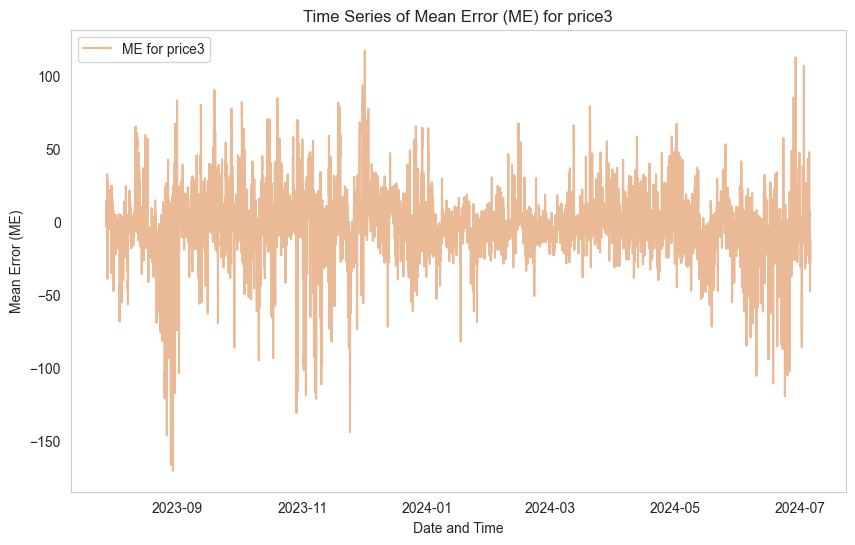

In [11]:

# Plotting MAE and ME separately with the specified palette
for price in prices:
    metrics_df = pd.DataFrame(metrics_data[price], index=df['datetime_from'])

    # Plot MAE
    plt.figure(figsize=(10, 6))
    plt.plot(metrics_df.index, metrics_df['MAE'], label=f'MAE for {price}', color=palette[price])
        
    plt.title(f'Time Series of Mean Absolute Error (MAE) for {price}')
    plt.xlabel('Date and Time')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend()
    plt.grid(False)
    plt.show()

    # Plot ME
    plt.figure(figsize=(10, 6))
    plt.plot(metrics_df.index, metrics_df['ME'], label=f'ME for {price}', color=palette[price])
        
    plt.title(f'Time Series of Mean Error (ME) for {price}')
    plt.xlabel('Date and Time')
    plt.ylabel('Mean Error (ME)')
    plt.legend()
    plt.grid(False)
    plt.show()

In [12]:
# Calculate overall metrics for the entire time series
overall_metrics = {price: {'MAE': 0, 'MSE': 0, 'RMSE': 0, 'ME': 0, 'R2': 0} for price in prices}

y_true = df['price'].values

for price in prices:
    y_pred = df[price].values
    mae = np.mean(np.abs(y_pred - y_true))
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    me = mean_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    overall_metrics[price]['MAE'] = mae
    overall_metrics[price]['MSE'] = mse
    overall_metrics[price]['RMSE'] = rmse
    overall_metrics[price]['ME'] = me
    overall_metrics[price]['R2'] = r2

# Display overall metrics
overall_metrics_df = pd.DataFrame(overall_metrics).T
print("Overall Metrics for the Entire Time Series:")
print(overall_metrics_df.T)

# Calculate and display Mean Absolute Error (MAE) for each forecasted price
mae_metrics = {price: np.mean(np.abs(df[price] - df['price'])) for price in prices}
mae_df = pd.DataFrame(mae_metrics, index=['MAE'])
print("\nMean Absolute Error (MAE) for Each Forecasted Price:")

print(mae_df)

Overall Metrics for the Entire Time Series:
          price1      price2      price3
MAE    15.528229   16.331329   14.613268
MSE   507.018067  573.651504  487.693185
RMSE   22.517062   23.951023   22.083777
ME      0.924324   -0.420496   -1.720145
R2      0.699462    0.659965    0.710917

Mean Absolute Error (MAE) for Each Forecasted Price:
        price1     price2     price3
MAE  15.528229  16.331329  14.613268


In [13]:
df.head()

,datetime_from,price,price1,price2,price3
0,2023-07-28 00:00:00,107.99,98.83,95.05,107.123
1,2023-07-28 01:00:00,106.04,95.19,93.70,104.801
2,2023-07-28 02:00:00,106.10,97.00,87.98,102.977
3,2023-07-28 03:00:00,105.00,100.36,89.45,109.143
4,2023-07-28 04:00:00,102.22,109.23,101.46,116.560


In [14]:
# Adding necessary columns for time-based grouping
df['hour'] = df['datetime_from'].dt.hour
df['day_of_week'] = df['datetime_from'].dt.dayofweek
df['month'] = df['datetime_from'].dt.month

# Prepare the data for grouping MAE and ME
grouped_metrics_data = {price: {'hour': [], 'day_of_week': [], 'month': []} for price in prices}

# Function to calculate grouped metrics
def calculate_grouped_metrics(grouped, price):
    mae = grouped.apply(lambda x: np.mean(np.abs(x[price] - x['price'])))
    me = grouped.apply(lambda x: mean_error(x['price'], x[price]))
    return mae, me

# Group by hour, day_of_week, and month and calculate MAE and ME
for price in prices:
    # Group by hour
    grouped = df.groupby('hour')
    mae, me = calculate_grouped_metrics(grouped, price)
    grouped_metrics_data[price]['hour'] = {'MAE': mae, 'ME': me}

    # Group by day_of_week
    grouped = df.groupby('day_of_week')
    mae, me = calculate_grouped_metrics(grouped, price)
    grouped_metrics_data[price]['day_of_week'] = {'MAE': mae, 'ME': me}

    # Group by month
    grouped = df.groupby('month')
    mae, me = calculate_grouped_metrics(grouped, price)
    grouped_metrics_data[price]['month'] = {'MAE': mae, 'ME': me}

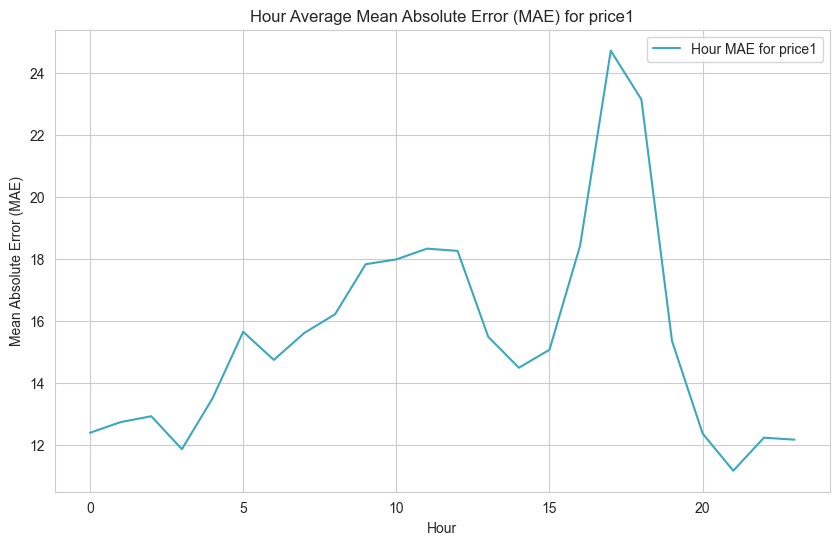

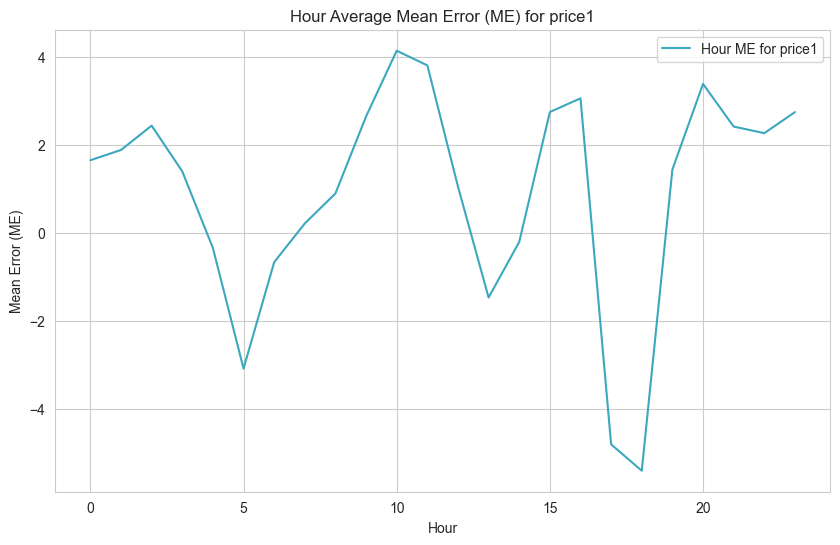

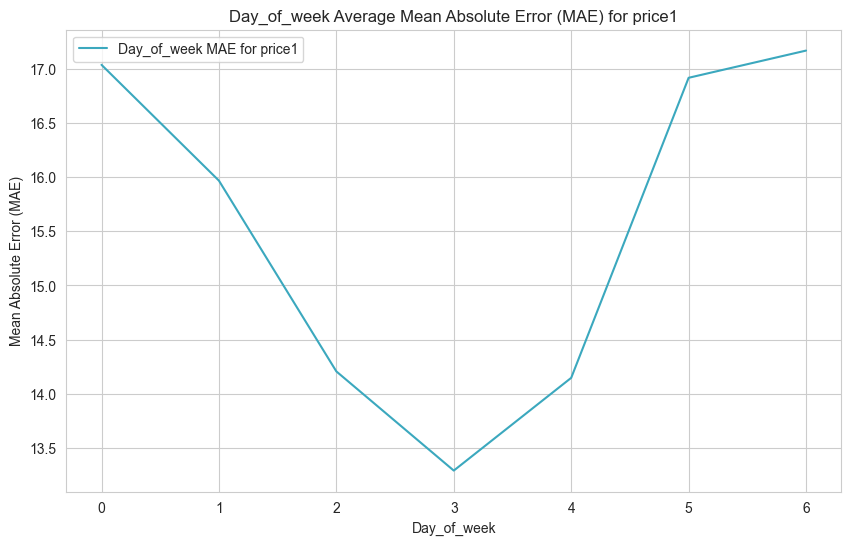

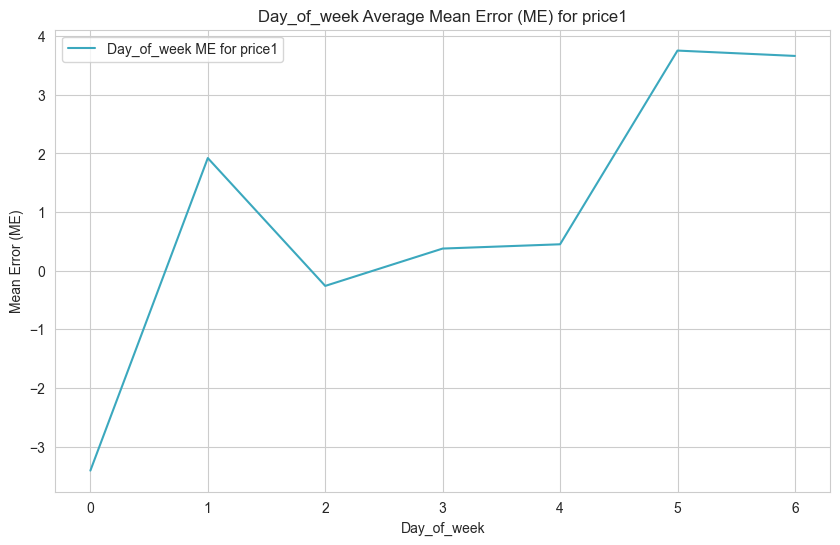

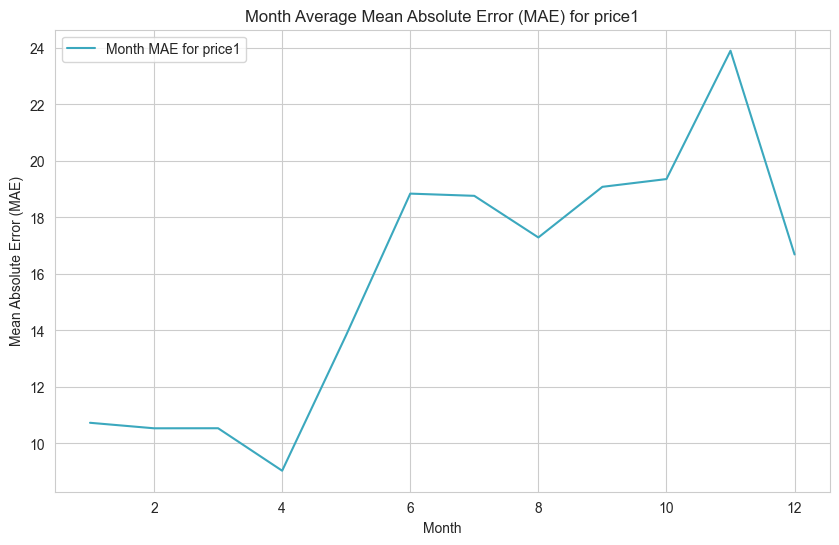

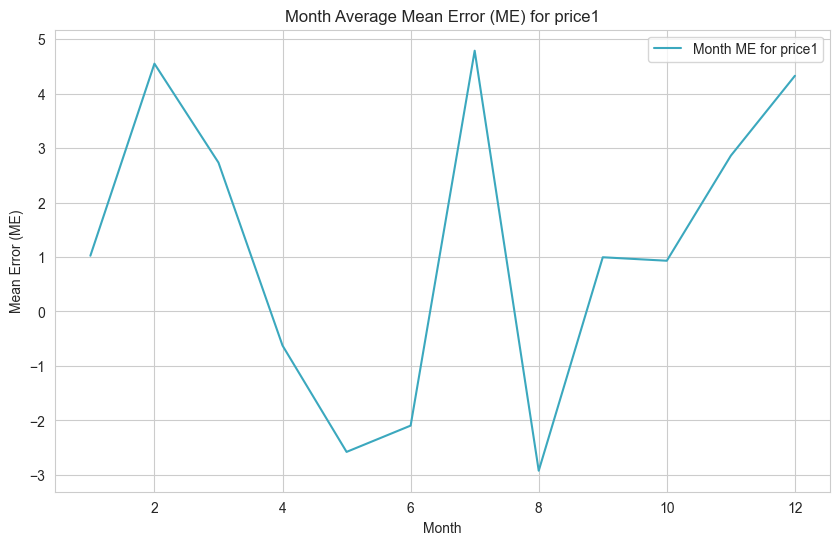

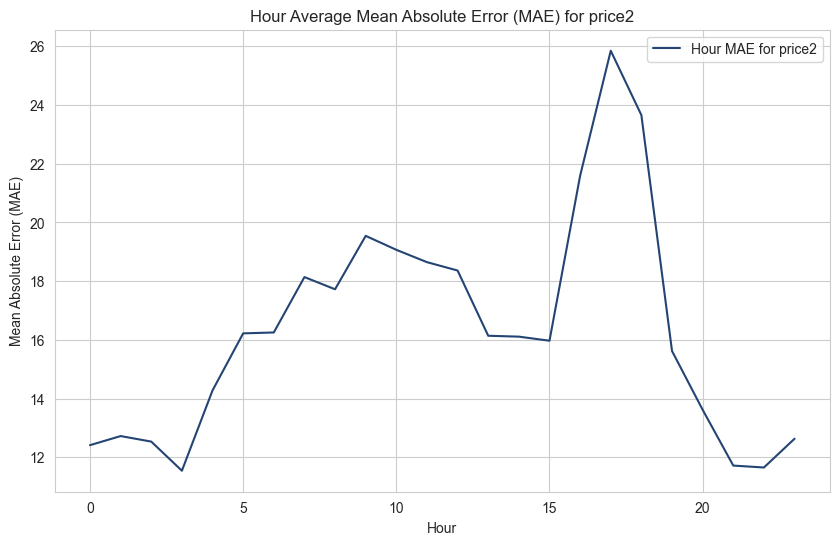

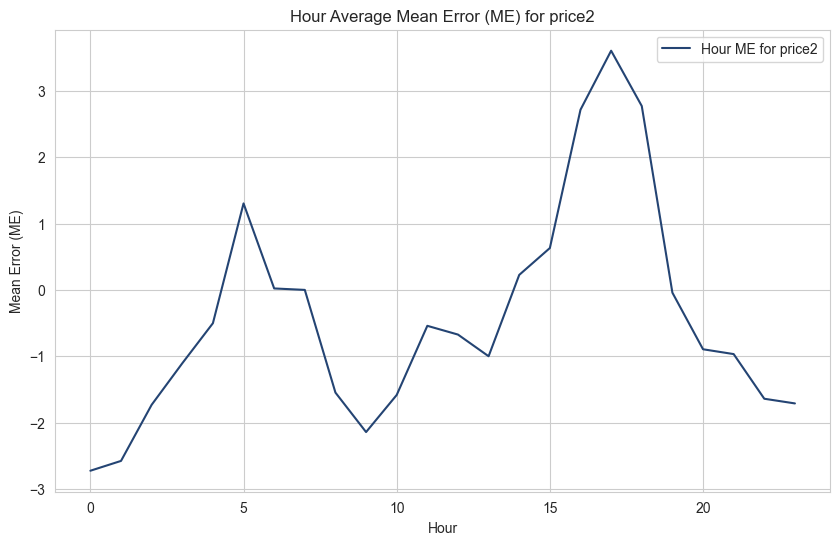

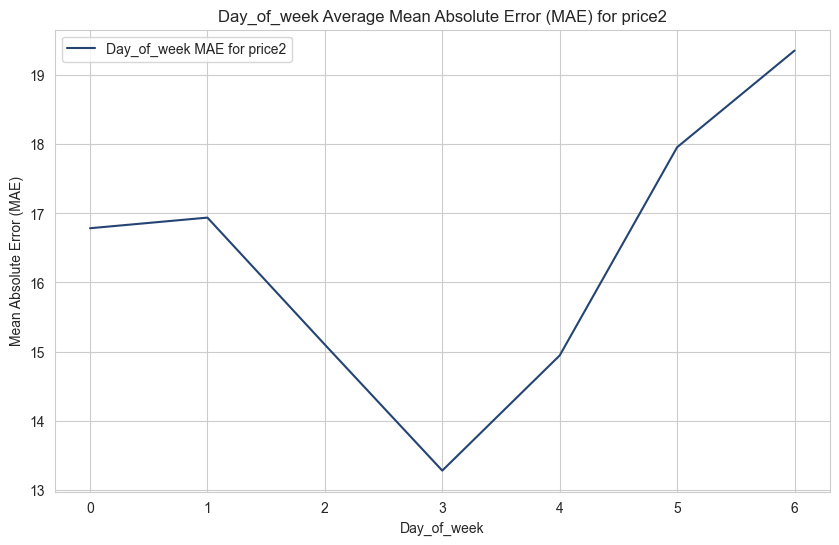

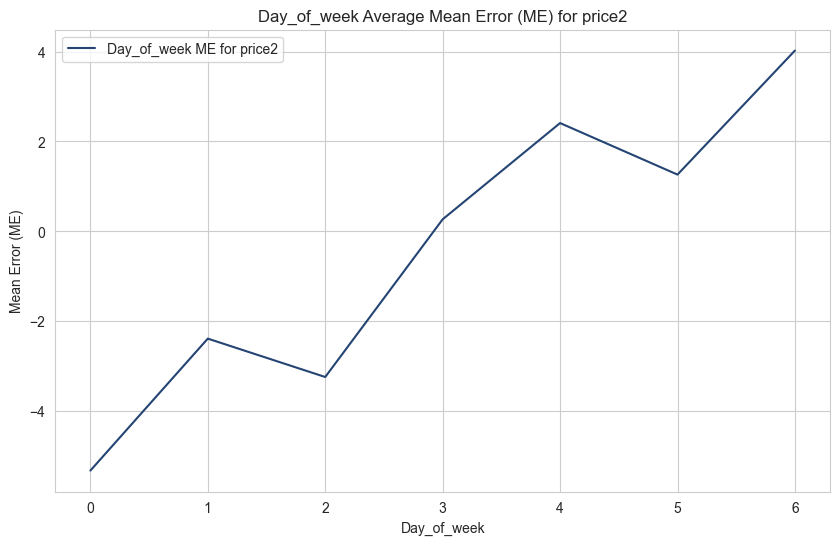

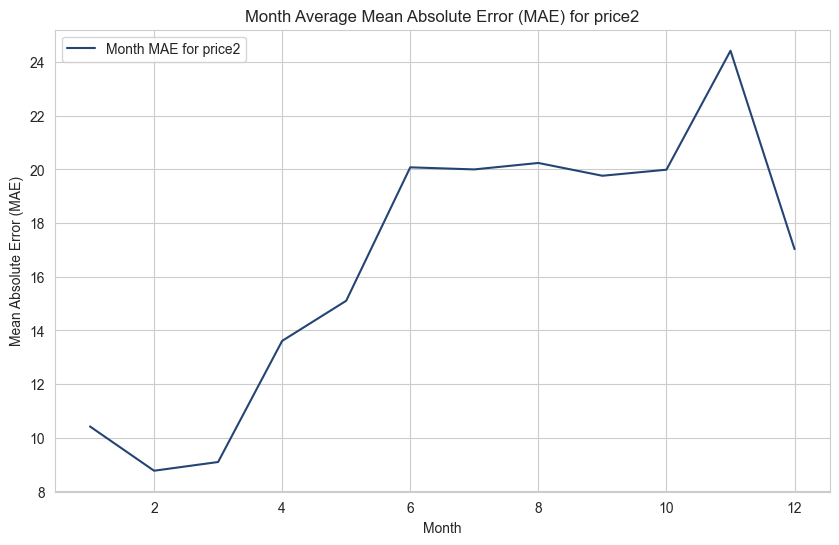

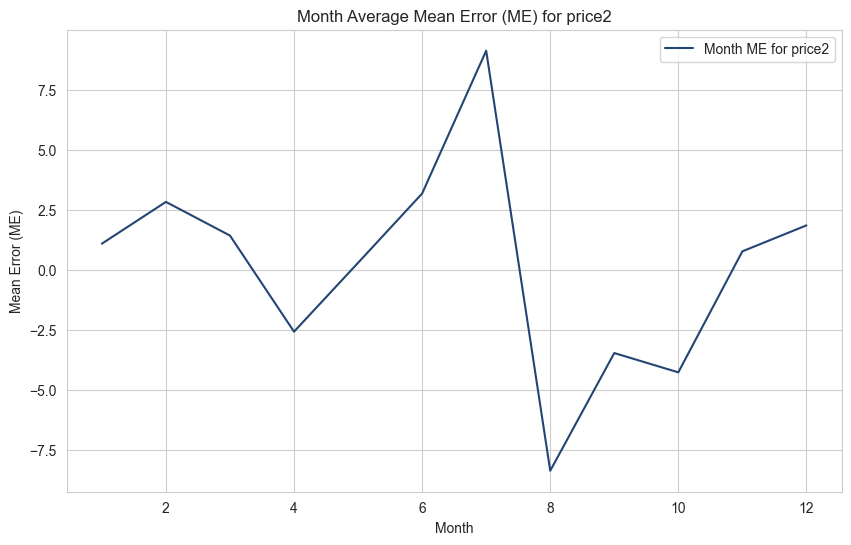

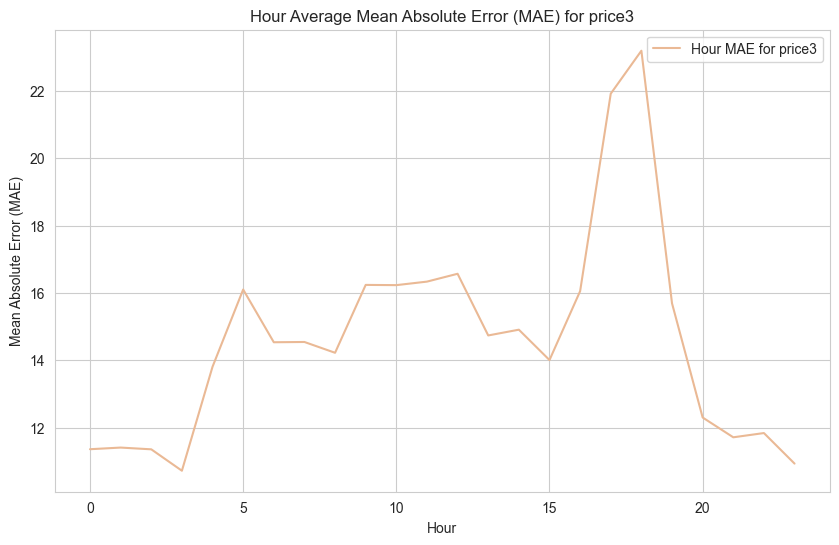

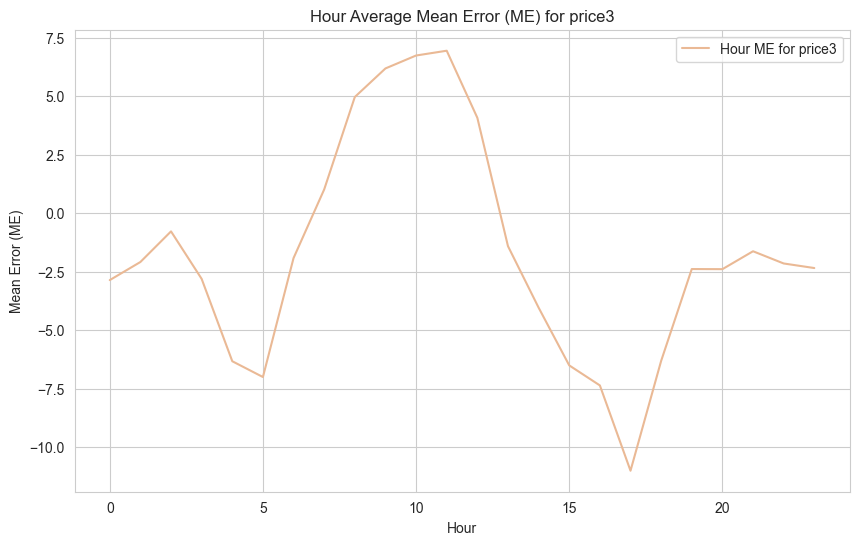

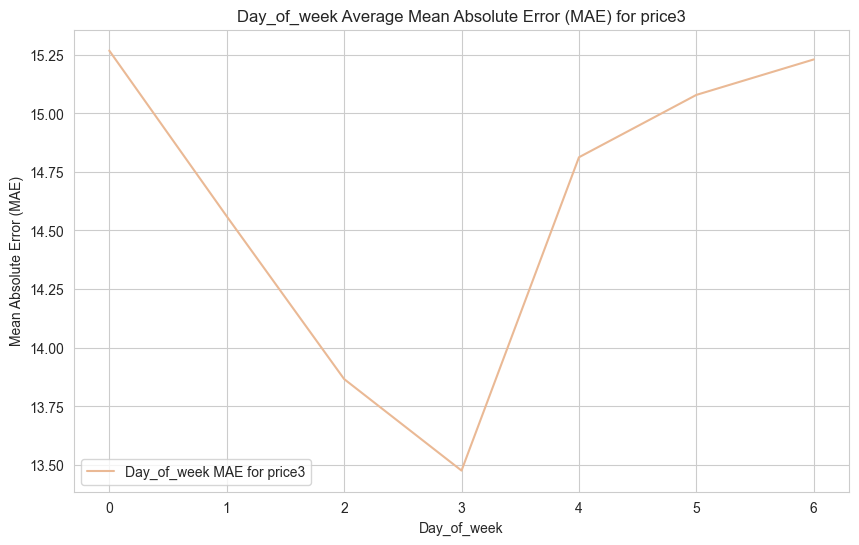

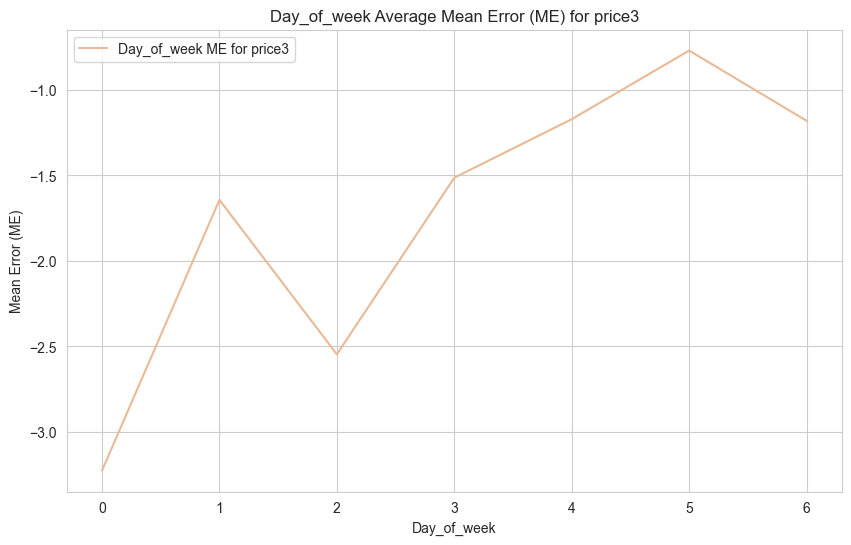

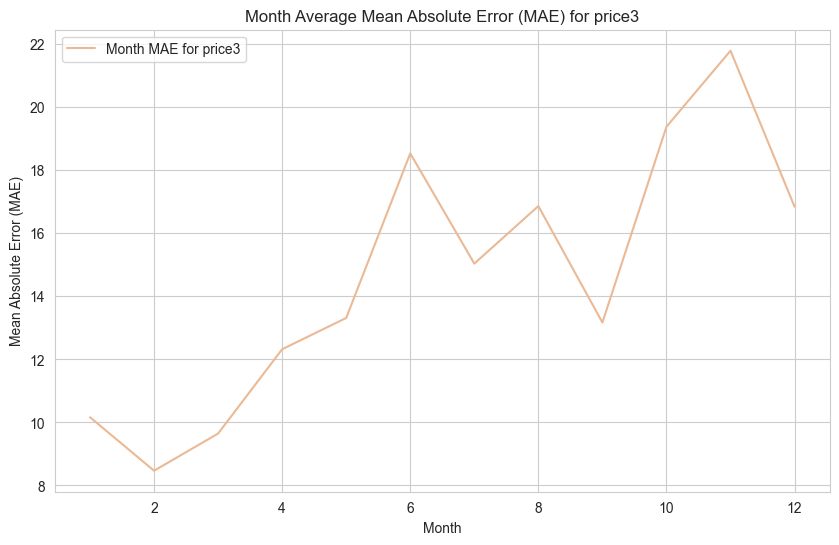

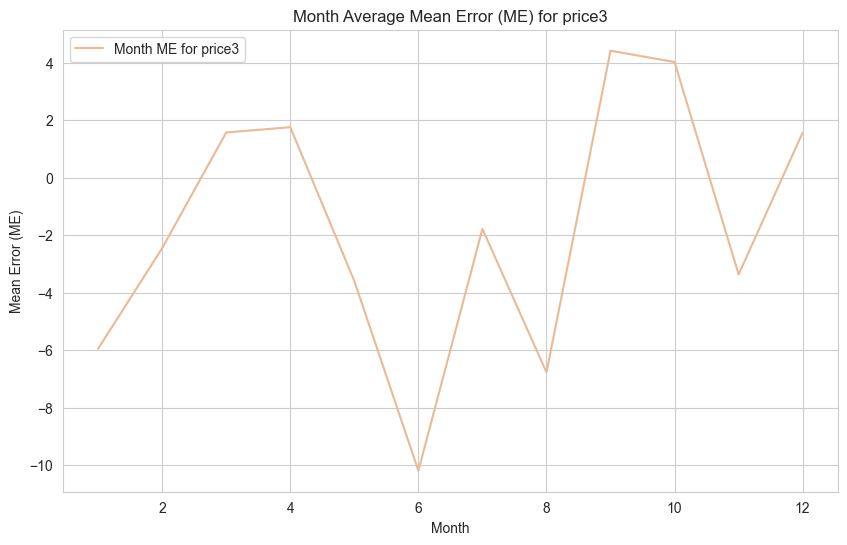

In [15]:
# Plotting grouped MAE and ME with the specified palette
for price in prices:
    for time_group in ['hour', 'day_of_week', 'month']:
        metrics_df = pd.DataFrame(grouped_metrics_data[price][time_group])

        # Plot MAE
        plt.figure(figsize=(10, 6))
        plt.plot(metrics_df.index, metrics_df['MAE'], label=f'{time_group.capitalize()} MAE for {price}', color=palette[price])
        
        plt.title(f'{time_group.capitalize()} Average Mean Absolute Error (MAE) for {price}')
        plt.xlabel(time_group.capitalize())
        plt.ylabel('Mean Absolute Error (MAE)')
        plt.legend()
        plt.grid(True)
        plt.show()
        # Plot ME
        plt.figure(figsize=(10, 6))
        plt.plot(metrics_df.index, metrics_df['ME'], label=f'{time_group.capitalize()} ME for {price}', color=palette[price])
        
        plt.title(f'{time_group.capitalize()} Average Mean Error (ME) for {price}')
        plt.xlabel(time_group.capitalize())
        plt.ylabel('Mean Error (ME)')
        plt.legend()
        plt.grid(True)
        plt.show()

### STARTING FROM ZERO

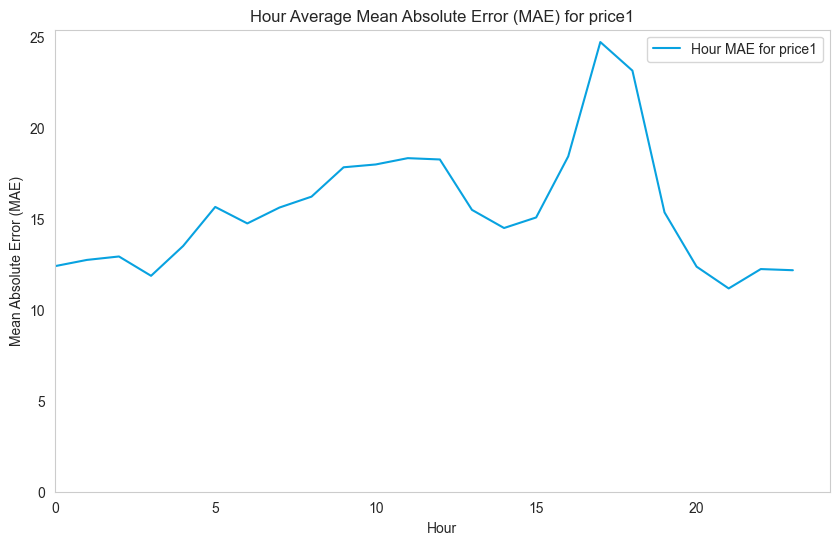

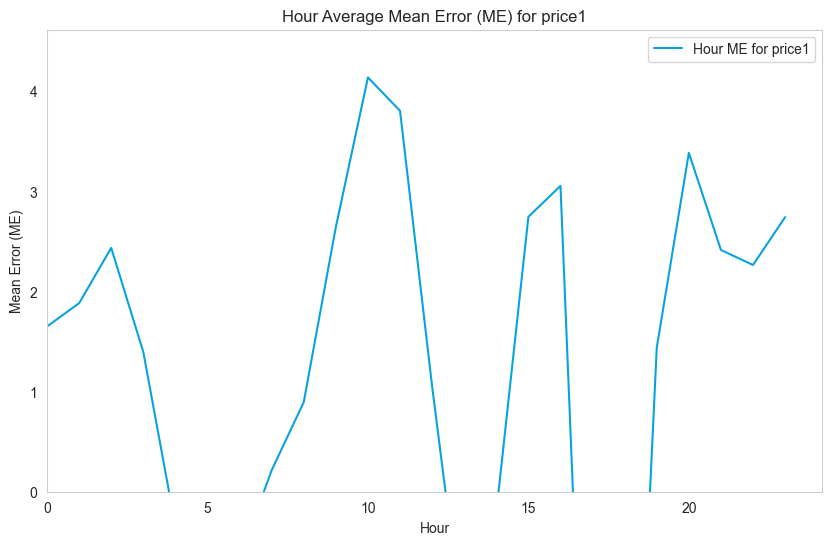

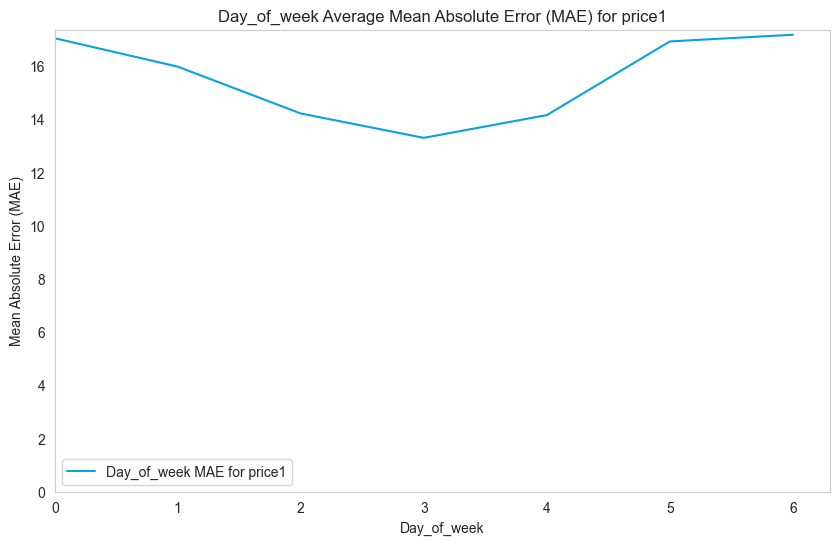

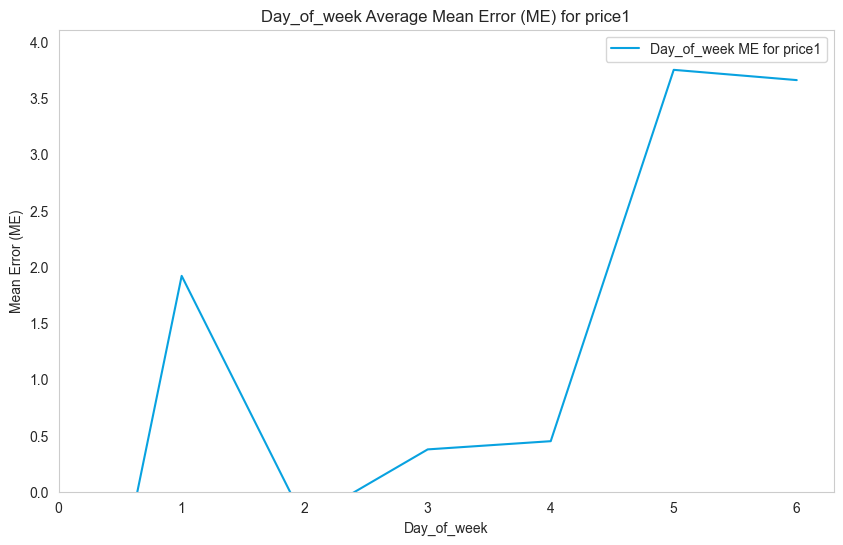

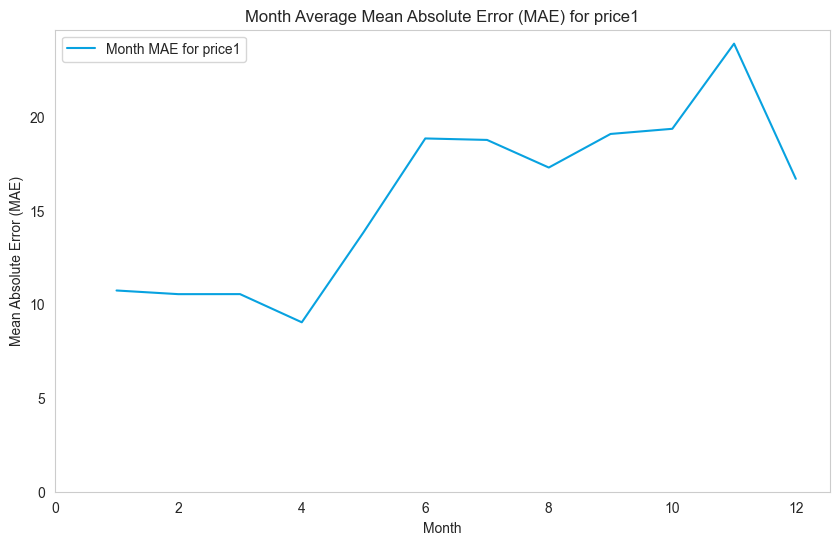

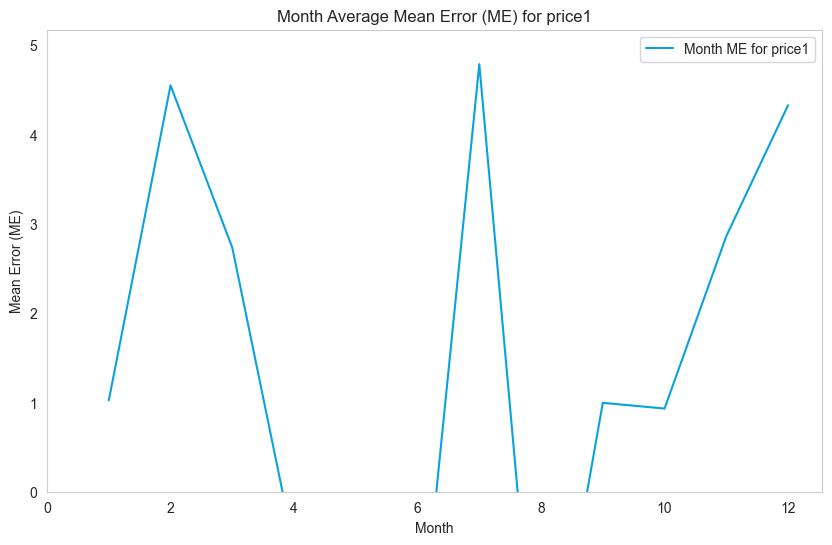

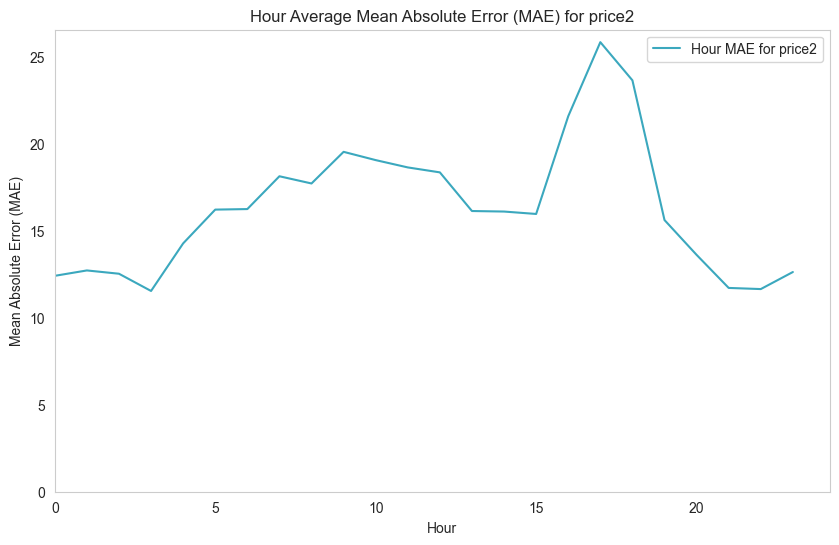

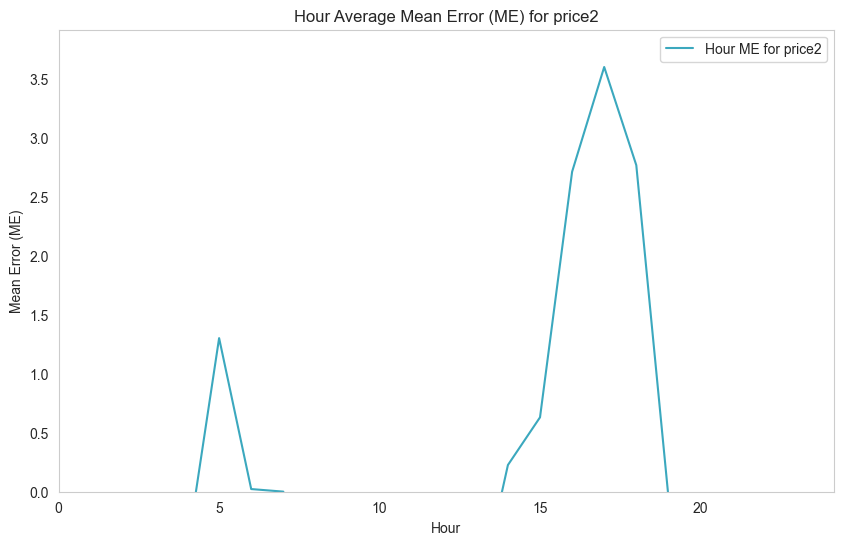

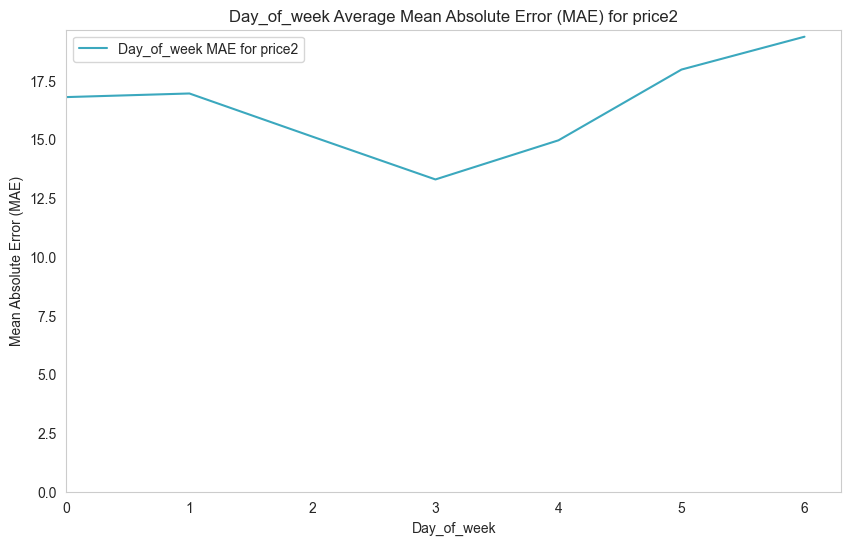

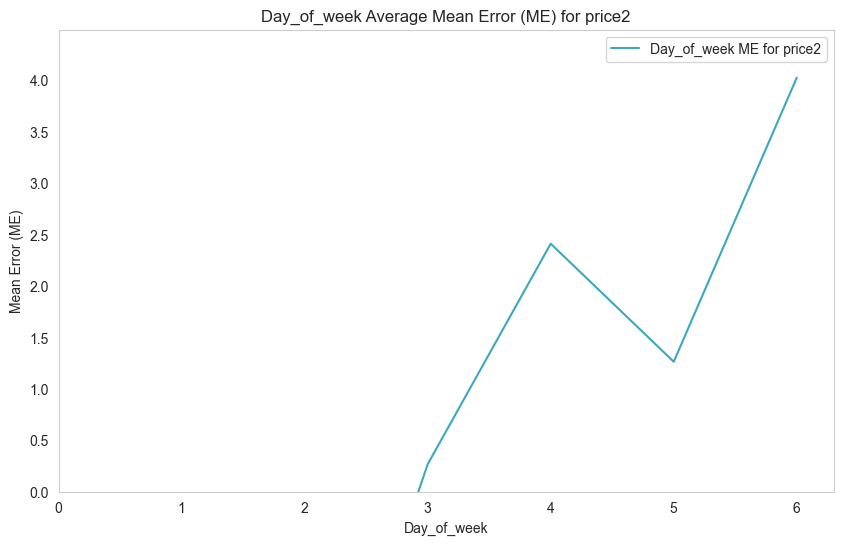

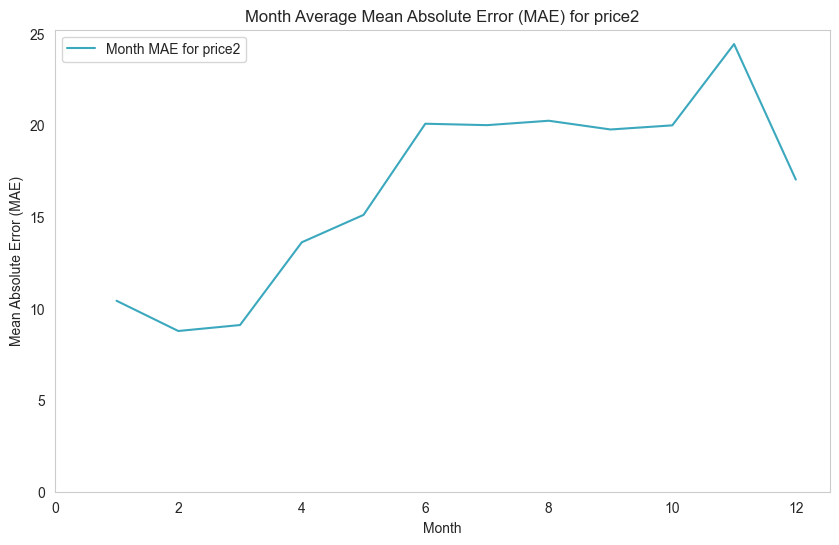

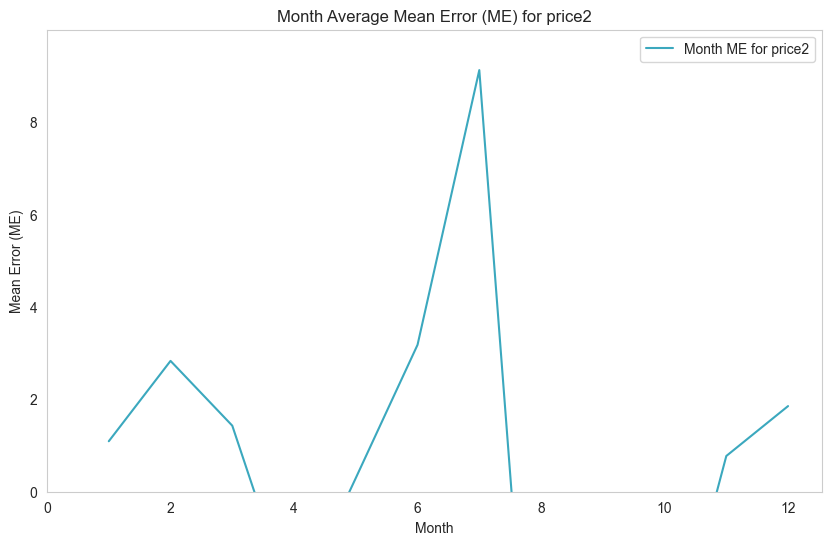

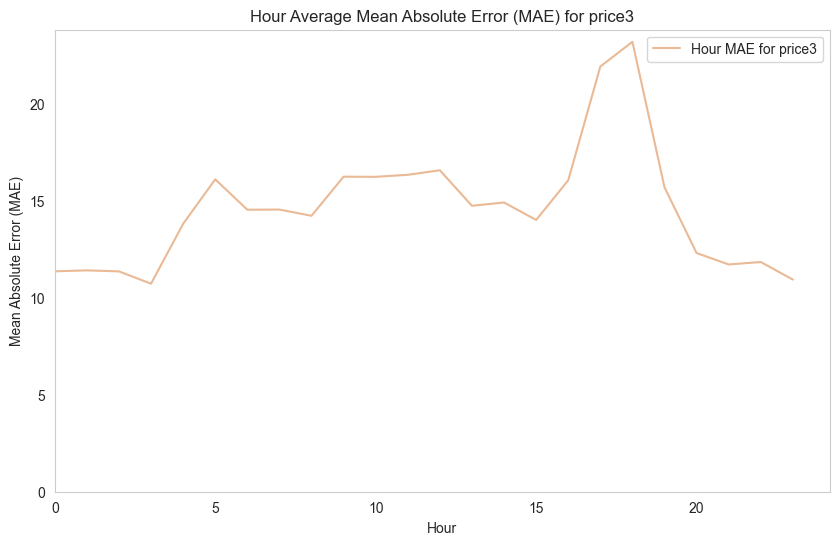

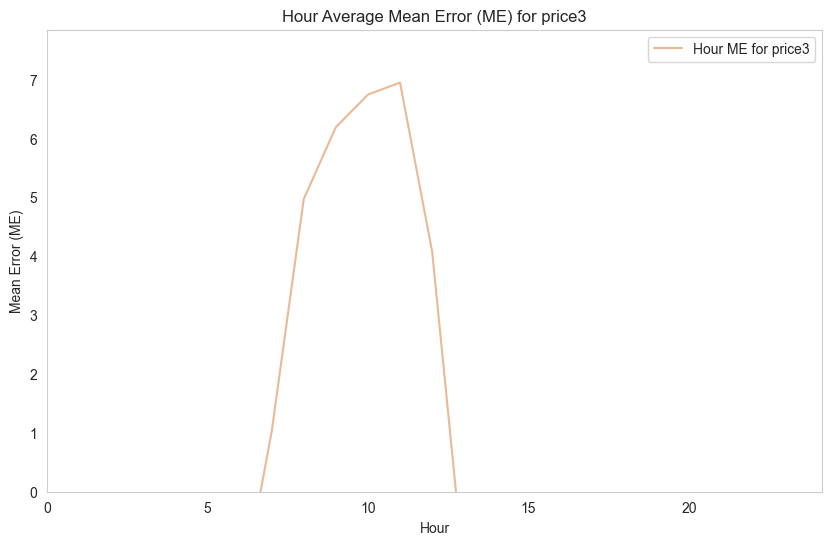

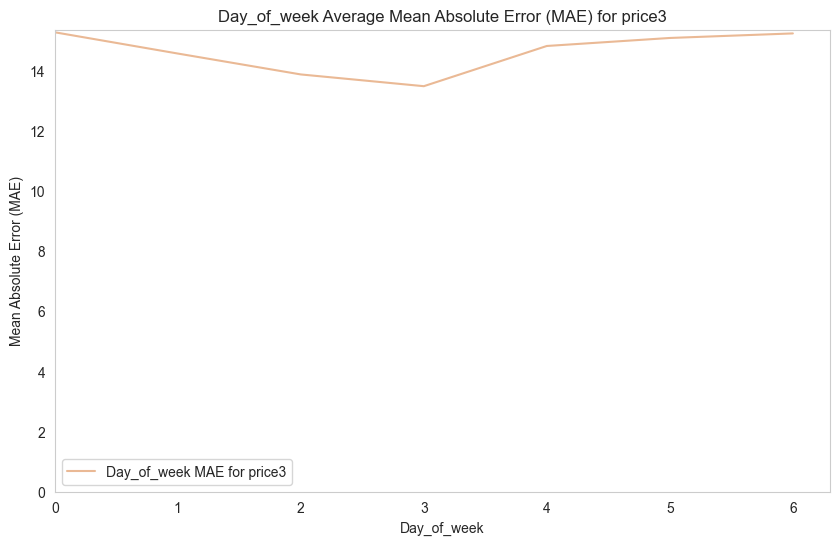

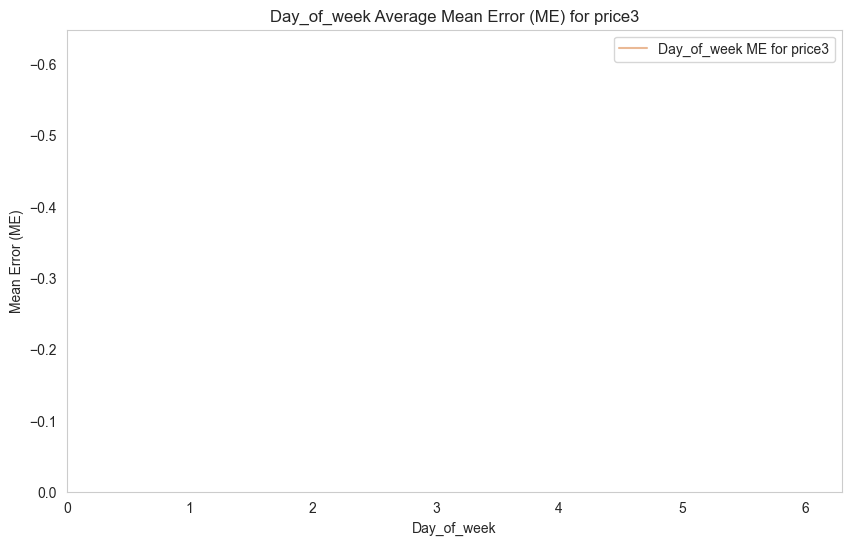

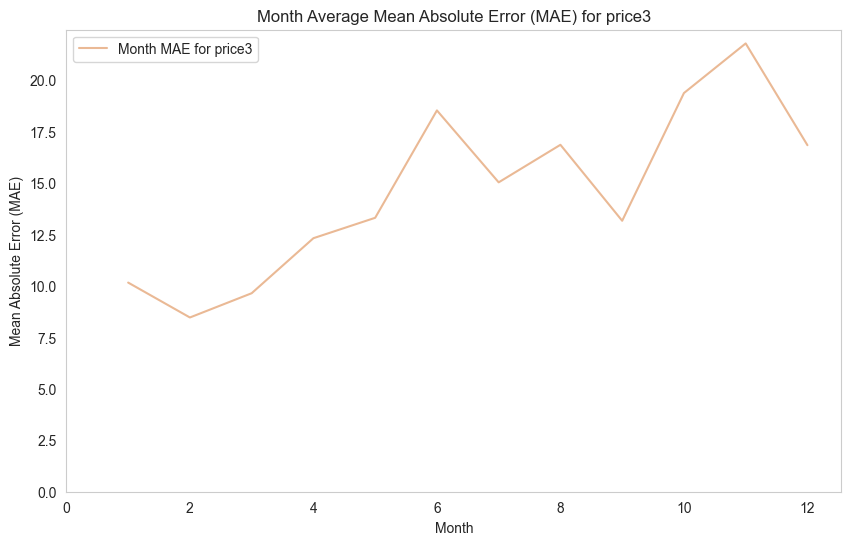

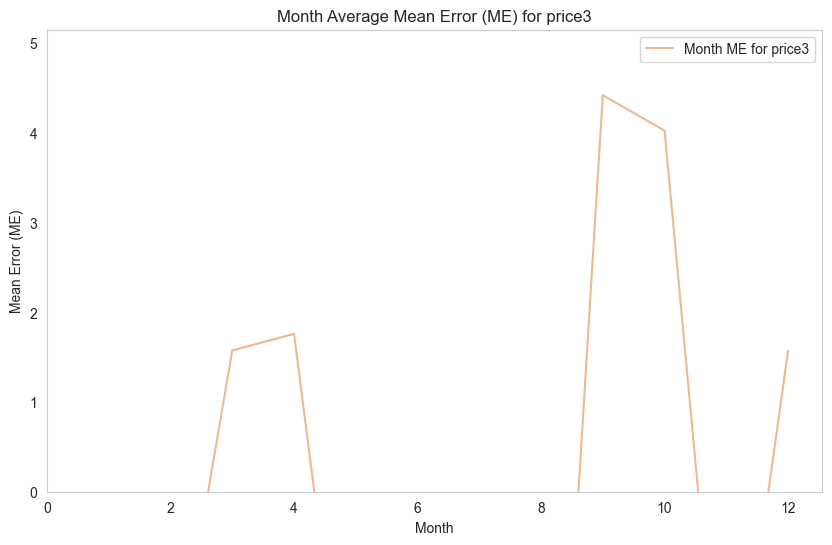

In [16]:
# Adding necessary columns for time-based grouping
df['hour'] = df['datetime_from'].dt.hour
df['day_of_week'] = df['datetime_from'].dt.dayofweek
df['month'] = df['datetime_from'].dt.month

# Prepare the data for grouping MAE and ME
grouped_metrics_data = {price: {'hour': [], 'day_of_week': [], 'month': []} for price in prices}

# Function to calculate grouped metrics
def calculate_grouped_metrics(grouped, price):
    mae = grouped.apply(lambda x: np.mean(np.abs(x[price] - x['price'])))
    me = grouped.apply(lambda x: mean_error(x['price'], x[price]))
    return mae, me

# Group by hour, day_of_week, and month and calculate MAE and ME
for price in prices:
    # Group by hour
    grouped = df.groupby('hour')
    mae, me = calculate_grouped_metrics(grouped, price)
    grouped_metrics_data[price]['hour'] = {'MAE': mae, 'ME': me}

    # Group by day_of_week
    grouped = df.groupby('day_of_week')
    mae, me = calculate_grouped_metrics(grouped, price)
    grouped_metrics_data[price]['day_of_week'] = {'MAE': mae, 'ME': me}

    # Group by month
    grouped = df.groupby('month')
    mae, me = calculate_grouped_metrics(grouped, price)
    grouped_metrics_data[price]['month'] = {'MAE': mae, 'ME': me}

# Define the color palette
# Define the color palette
palette = {
    'price1': '#3ba8be',  # teal
    'price2': '#244473',  # dark_blue 
    'price3': '#eab995'   # peach
}

# Plotting grouped MAE and ME with the specified palette
for price in prices:
    for time_group in ['hour', 'day_of_week', 'month']:
        metrics_df = pd.DataFrame(grouped_metrics_data[price][time_group])

        # Plot MAE
        plt.figure(figsize=(10, 6))
        plt.plot(metrics_df.index, metrics_df['MAE'], label=f'{time_group.capitalize()} MAE for {price}', color=palette[price])
        
        plt.title(f'{time_group.capitalize()} Average Mean Absolute Error (MAE) for {price}')
        plt.xlabel(time_group.capitalize())
        plt.ylabel('Mean Absolute Error (MAE)')
        plt.legend()
        plt.grid(True)
        plt.ylim(bottom=0)
        plt.xlim(left=0)
        plt.grid(False)
        plt.show()

        # Plot ME
        plt.figure(figsize=(10, 6))
        plt.plot(metrics_df.index, metrics_df['ME'], label=f'{time_group.capitalize()} ME for {price}', color=palette[price])
        
        plt.title(f'{time_group.capitalize()} Average Mean Error (ME) for {price}')
        plt.xlabel(time_group.capitalize())
        plt.ylabel('Mean Error (ME)')
        plt.legend()
        plt.grid(True)
        plt.ylim(bottom=0)
        plt.xlim(left=0)
        plt.grid(False)
        plt.show()


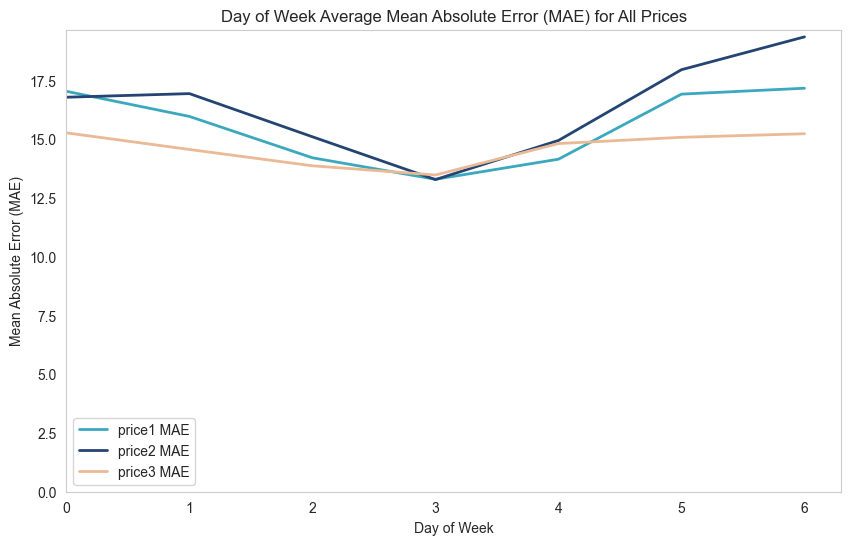

In [19]:
# Combine day_of_week MAE for all prices into one plot
plt.figure(figsize=(10, 6))
# Define your line thickness
line_thickness = 2.0  # Adjust this value as needed
for price in prices:
    metrics_df = pd.DataFrame(grouped_metrics_data[price]['day_of_week'])
    plt.plot(metrics_df.index, metrics_df['MAE'], label=f'{price} MAE', color=palette[price],linewidth=line_thickness)

plt.title('Day of Week Average Mean Absolute Error (MAE) for All Prices')
plt.xlabel('Day of Week')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid(False)
plt.show()

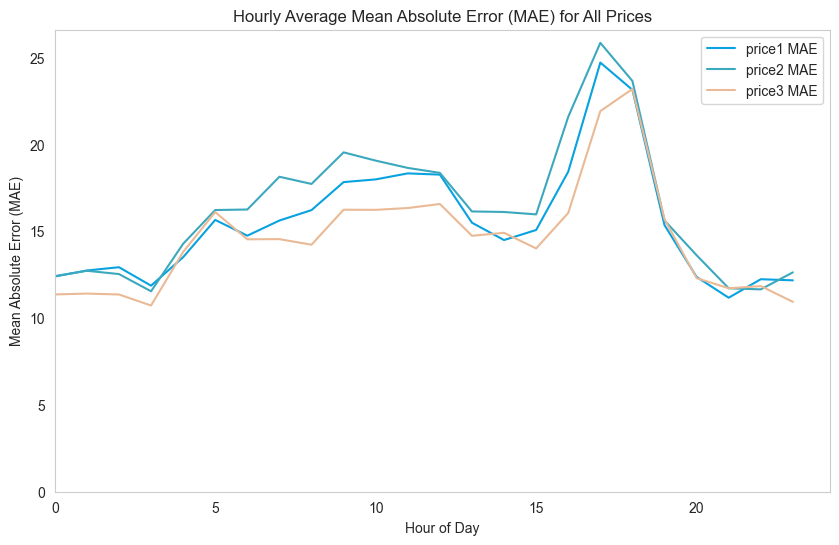

In [116]:
# Combine hourly MAE for all prices into one plot
plt.figure(figsize=(10, 6))

for price in prices:
    metrics_df = pd.DataFrame(grouped_metrics_data[price]['hour'])
    plt.plot(metrics_df.index, metrics_df['MAE'], label=f'{price} MAE', color=palette[price])

plt.title('Hourly Average Mean Absolute Error (MAE) for All Prices')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid(False)
plt.show()

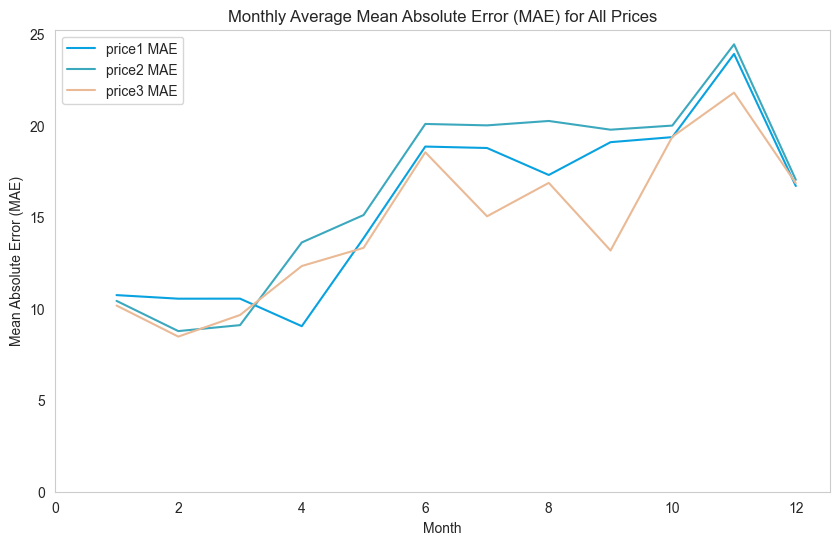

In [117]:
# Combine monthly MAE for all prices into one plot
plt.figure(figsize=(10, 6))

for price in prices:
    metrics_df = pd.DataFrame(grouped_metrics_data[price]['month'])
    plt.plot(metrics_df.index, metrics_df['MAE'], label=f'{price} MAE', color=palette[price])

plt.title('Monthly Average Mean Absolute Error (MAE) for All Prices')
plt.xlabel('Month')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid(False)
plt.show()

In [118]:
df.head()

,datetime_from,price,price1,price2,price3,hour,day_of_week,month
0,2023-07-28 00:00:00,107.99,98.83,95.05,107.123,0,4,7
1,2023-07-28 01:00:00,106.04,95.19,93.70,104.801,1,4,7
2,2023-07-28 02:00:00,106.10,97.00,87.98,102.977,2,4,7
3,2023-07-28 03:00:00,105.00,100.36,89.45,109.143,3,4,7
4,2023-07-28 04:00:00,102.22,109.23,101.46,116.560,4,4,7


In [ ]:
palette = {'gray': '#5e6268',
 'light_blue': '#08a2e0',
 'blue_gray': '#74989a',
 'teal': '#3ba8be',
 'red': '#eb491f',
 'light_teal': '#69bed4',
 'dark_gray': '#0c131d',
 'dark_blue': '#244473',
 'medium_blue': '#2464ac',
 'peach': '#eab995'}

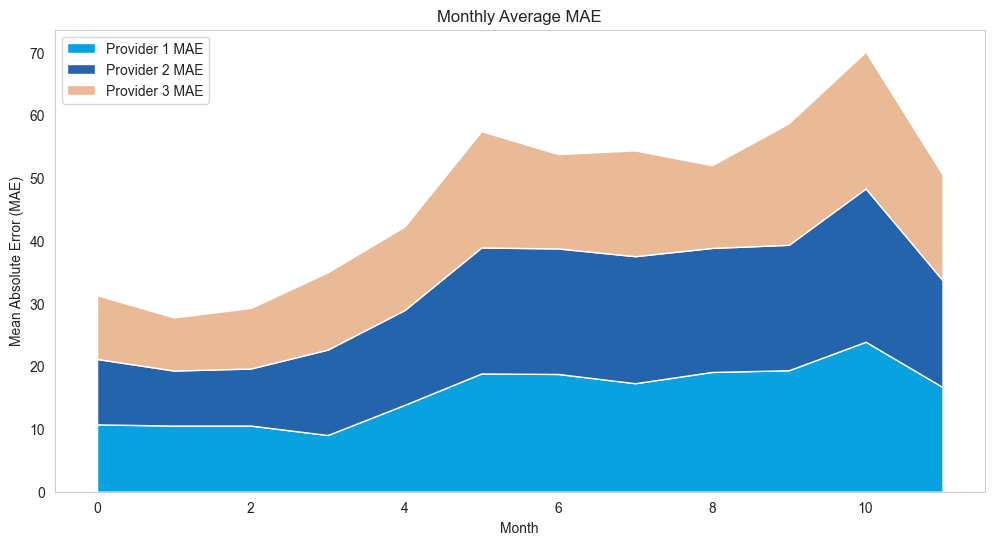

In [120]:
#df['hour'] = df.index.hour
#df['day_of_week'] = df.index.dayofweek
#df['month'] = df.index.month

# Function to calculate MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Prepare the data for grouping MAE
grouped_mae_data = {'hour': {}, 'day_of_week': {}, 'month': {}}
prices = ['price1', 'price2', 'price3']

# Calculate grouped MAE
for group in grouped_mae_data.keys():
    grouped = df.groupby(group)
    for price in prices:
        grouped_mae_data[group][price] = grouped.apply(lambda x: calculate_mae(x['price'], x[price]))

# Define the color palette
# Define the color palette
palette = {
    'price1': '#3ba8be',  # teal
    'price2': '#244473',  # dark_blue 
    'price3': '#eab995'   # peach
}

# Plotting function
def plot_stacked_area(data, group, title):
    df_mae = pd.DataFrame(data)
    df_mae.reset_index(inplace=True)
    
    plt.figure(figsize=(12, 6))
    plt.stackplot(df_mae.index, df_mae['price1'], df_mae['price2'], df_mae['price3'],
                  labels=['Provider 1 MAE', 'Provider 2 MAE', 'Provider 3 MAE'],
                  colors=[palette['price1'], palette['price2'], palette['price3']])
    plt.title(f'{title} Average MAE')
    plt.xlabel(group.capitalize())
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.legend(loc='upper left')
    plt.ylim(bottom=0)
    plt.grid(False)
    plt.show()

# Plotting monthly MAE
plot_stacked_area(grouped_mae_data['month'], 'month', 'Monthly')

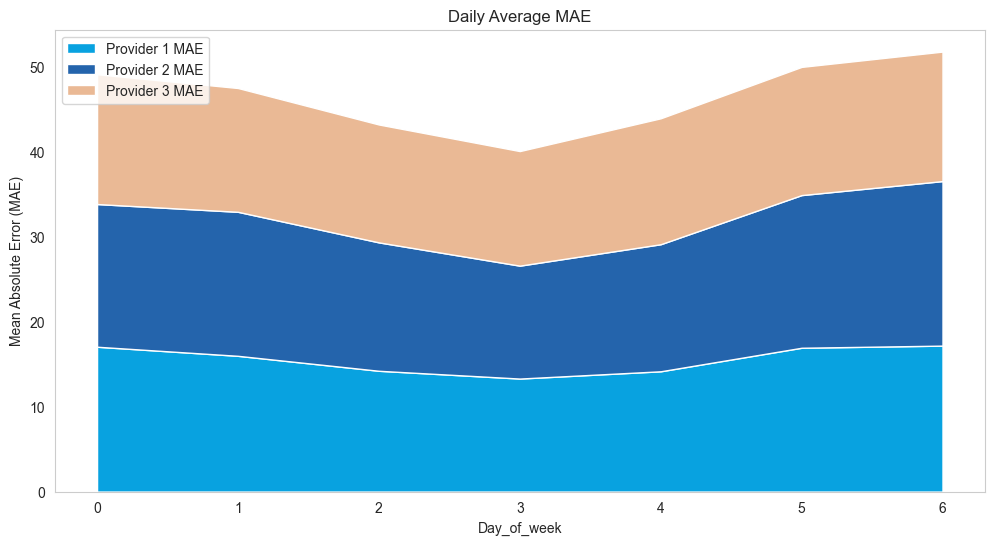

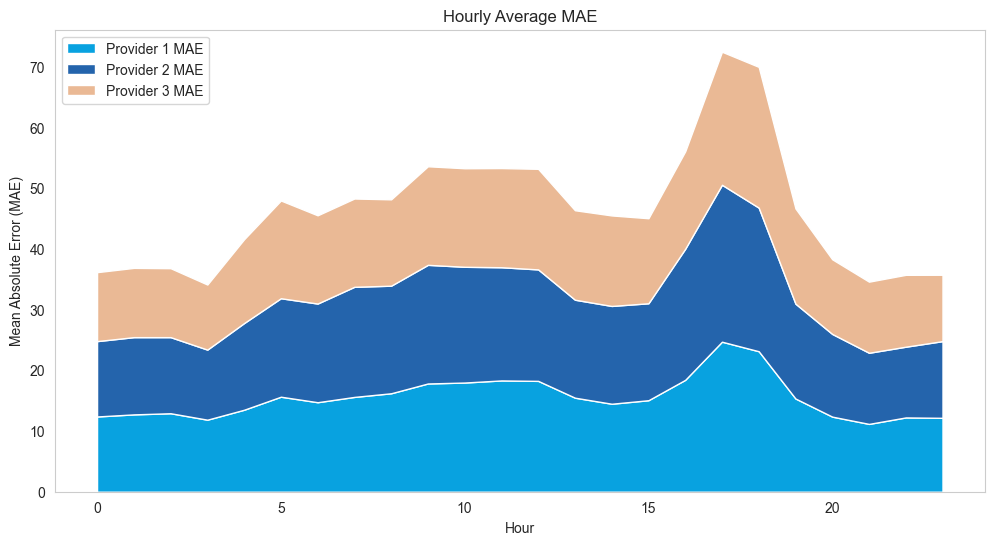

In [121]:
# Plotting daily, monthly, and hourly MAE
plot_stacked_area(grouped_mae_data['day_of_week'], 'day_of_week', 'Daily')
plot_stacked_area(grouped_mae_data['hour'], 'hour', 'Hourly')